# Explore and Summarize Data - Loan Data

## Introduction

> The purspose of this project is to explore and analyze a certain data set. The data set I have chosen for this project is Prosper Loan Data. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information. The full dataset can be seen [Here](https://github.com/TrikerDev/Explore-and-Summarize-Data---Loan-Data/blob/master/Explore%20and%20Summarize%20Data%20-%20Loan%20Data/prosperLoanData.csv) and the definitions the variables can be seen [Here](https://github.com/TrikerDev/Explore-and-Summarize-Data---Loan-Data/blob/master/Explore%20and%20Summarize%20Data%20-%20Loan%20Data/Prosper%20Loan%20Data%20-%20Variable%20Definitions%20-%20Sheet1.pdf). This full project and all files and work can be seen on [This Github Repository](https://github.com/TrikerDev/Explore-and-Summarize-Data---Loan-Data). This project was carried out through Jupyter Notebooks using [IRkernal, which allows for the use of R in Jupyter](https://irkernel.github.io/installation/#binary-panel).

## Loading Data

In [48]:
# Installing packages to be used
install.packages("ggplot2", dependencies = T) 
install.packages("knitr", dependencies = T)
install.packages("dplyr", dependencies = T)
# They have already been installed before, hence the warning message. It is only necessary for the first time running

Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'knitr' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"


In [49]:
# Importing packages to be used
library(ggplot2)
library(knitr)
library(dplyr)

In [50]:
# Loading in dataset, setting to variable 'data'
data <- read.csv('prosperLoanData.csv')

In [51]:
# variables in dataset
names(data)

[1] "ListingKey"                          "ListingNumber"                      
 [3] "ListingCreationDate"                 "CreditGrade"                        
 [5] "Term"                                "LoanStatus"                         
 [7] "ClosedDate"                          "BorrowerAPR"                        
 [9] "BorrowerRate"                        "LenderYield"                        
[11] "EstimatedEffectiveYield"             "EstimatedLoss"                      
[13] "EstimatedReturn"                     "ProsperRating..numeric."            
[15] "ProsperRating..Alpha."               "ProsperScore"                       
[17] "ListingCategory..numeric."           "BorrowerState"                      
[19] "Occupation"                          "EmploymentStatus"                   
[21] "EmploymentStatusDuration"            "IsBorrowerHomeowner"                
[23] "CurrentlyInGroup"                    "GroupKey"                           
[25] "DateCreditPulled"                    "CreditScoreRangeLower"              
[27] "CreditScoreRangeUpper"               "FirstRecordedCreditLine"            
[29] "CurrentCreditLines"                  "OpenCreditLines"                    
[31] "TotalCreditLinespast7years"          "OpenRevolvingAccounts"              
[33] "OpenRevolvingMonthlyPayment"         "InquiriesLast6Months"               
[35] "TotalInquiries"                      "CurrentDelinquencies"               
[37] "AmountDelinquent"                    "DelinquenciesLast7Years"            
[39] "PublicRecordsLast10Years"            "PublicRecordsLast12Months"          
[41] "RevolvingCreditBalance"              "BankcardUtilization"                
[43] "AvailableBankcardCredit"             "TotalTrades"                        
[45] "TradesNeverDelinquent..percentage."  "TradesOpenedLast6Months"            
[47] "DebtToIncomeRatio"                   "IncomeRange"                        
[49] "IncomeVerifiable"                    "StatedMonthlyIncome"                
[51] "LoanKey"                             "TotalProsperLoans"                  
[53] "TotalProsperPaymentsBilled"          "OnTimeProsperPayments"              
[55] "ProsperPaymentsLessThanOneMonthLate" "ProsperPaymentsOneMonthPlusLate"    
[57] "ProsperPrincipalBorrowed"            "ProsperPrincipalOutstanding"        
[59] "ScorexChangeAtTimeOfListing"         "LoanCurrentDaysDelinquent"          
[61] "LoanFirstDefaultedCycleNumber"       "LoanMonthsSinceOrigination"         
[63] "LoanNumber"                          "LoanOriginalAmount"                 
[65] "LoanOriginationDate"                 "LoanOriginationQuarter"             
[67] "MemberKey"                           "MonthlyLoanPayment"                 
[69] "LP_CustomerPayments"                 "LP_CustomerPrincipalPayments"       
[71] "LP_InterestandFees"                  "LP_ServiceFees"                     
[73] "LP_CollectionFees"                   "LP_GrossPrincipalLoss"              
[75] "LP_NetPrincipalLoss"                 "LP_NonPrincipalRecoverypayments"    
[77] "PercentFunded"                       "Recommendations"                    
[79] "InvestmentFromFriendsCount"          "InvestmentFromFriendsAmount"        
[81] "Investors"

> There are a lot of variables here and we are going to narrow these down to 10 variables to perform an analysis on. These variables will be:
> * Term
> * BorrowerAPR
> * BankcardUtilization
> * IncomeRange
> * LoanOriginalAmount
> * InquiriesLast6Months
> * EmploymentStatus
> * CreditScoreRangeLower
> * CreditScoreRangeUpper
> * LoanStatus

> I feel that these variables will provide good insight on loans off of eachother, for example, how does employment status affect the inquiries in the past 6 months? How does credit score affect the loan amount? These variables should provide good insight into different types of loans and how they affect other variables.

In [52]:
# Getting the variables we want to keep
vars <- c('Term','BorrowerAPR','BankcardUtilization','IncomeRange','LoanOriginalAmount','InquiriesLast6Months','EmploymentStatus','CreditScoreRangeLower','CreditScoreRangeUpper','LoanStatus')

# Assigning the variables we want to a seperate dataset
newData <- data[vars]

# Showing the names of the new dataset to make sure we got the correct variables
names(newData)

[1] "Term"                  "BorrowerAPR"           "BankcardUtilization"  
 [4] "IncomeRange"           "LoanOriginalAmount"    "InquiriesLast6Months" 
 [7] "EmploymentStatus"      "CreditScoreRangeLower" "CreditScoreRangeUpper"
[10] "LoanStatus"

## Univariate Analysis

### Term

> The length of the loan expressed in months.

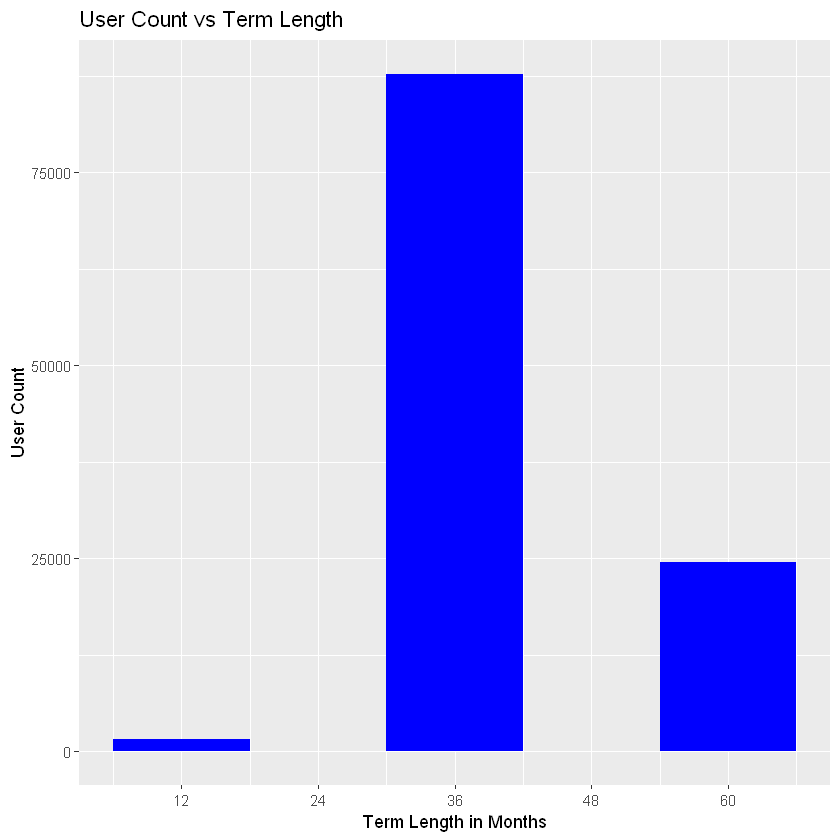

In [53]:
termData <- newData['Term']

termChart <- ggplot(aes(x = Term), data = termData) +
                geom_histogram(binwidth = 12, fill = 'blue') +
                scale_x_continuous(breaks = seq(0, 60, 12))

termChart + ggtitle('User Count vs Term Length') +
            xlab('Term Length in Months') +
            ylab('User Count')

> We can see from this chart that the terms offered by Prosper are either 12 months, 36 months, or 60 months. 1, 3, or 5 years. Nothing inbetween. From the user count, the most popular term length is 3 years, followed by significantly less users at 5 year terms. The 1 year term is very unpopular by a user count perspective.

### Borrower APR

> The Borrower's Annual Percentage Rate (APR) for the loan. 

Warning message:
"Removed 25 rows containing non-finite values (stat_bin)."


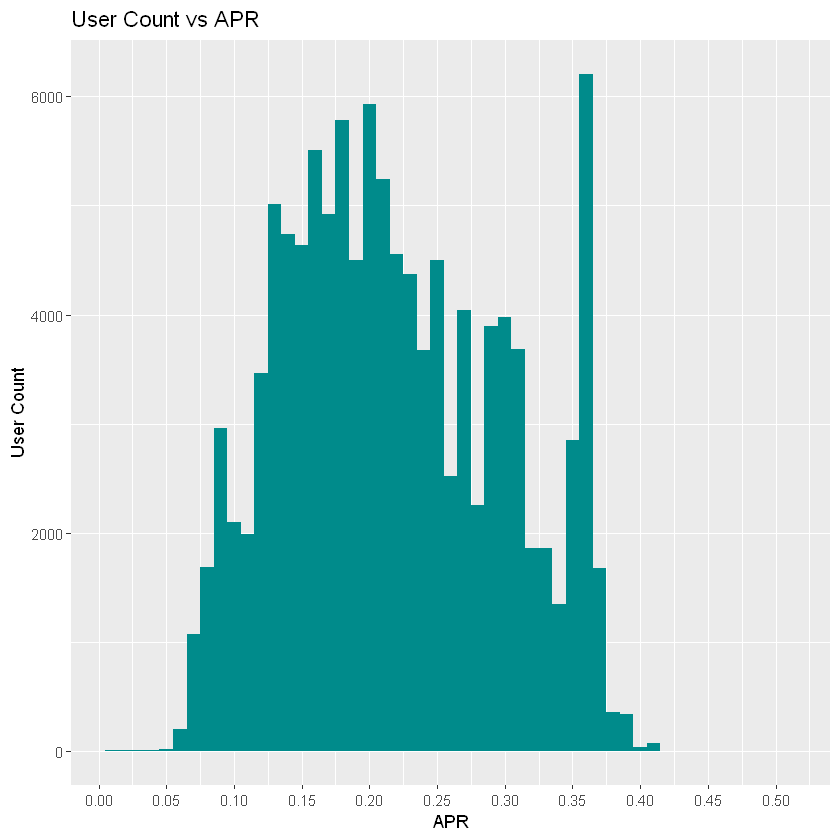

In [54]:
aprData <- newData['BorrowerAPR']

aprChart <- ggplot(aes(x = BorrowerAPR), data = aprData) +
                geom_histogram(binwidth = 0.01, fill = 'cyan4') +
                scale_x_continuous(breaks = seq(0, 0.5, 0.05))

aprChart + ggtitle('User Count vs APR') +
            xlab('APR') +
            ylab('User Count')

> APR is really spread out all over the place. There really isnt one APR that is significantly more common than the others. The count with the highest is around ~0.38 but there is a very even grouping of users with APR all over the chart.

### Bankcard Utilization

> The percentage of available revolving credit that is utilized at the time the credit profile was pulled.

Warning message:
"Removed 25854 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


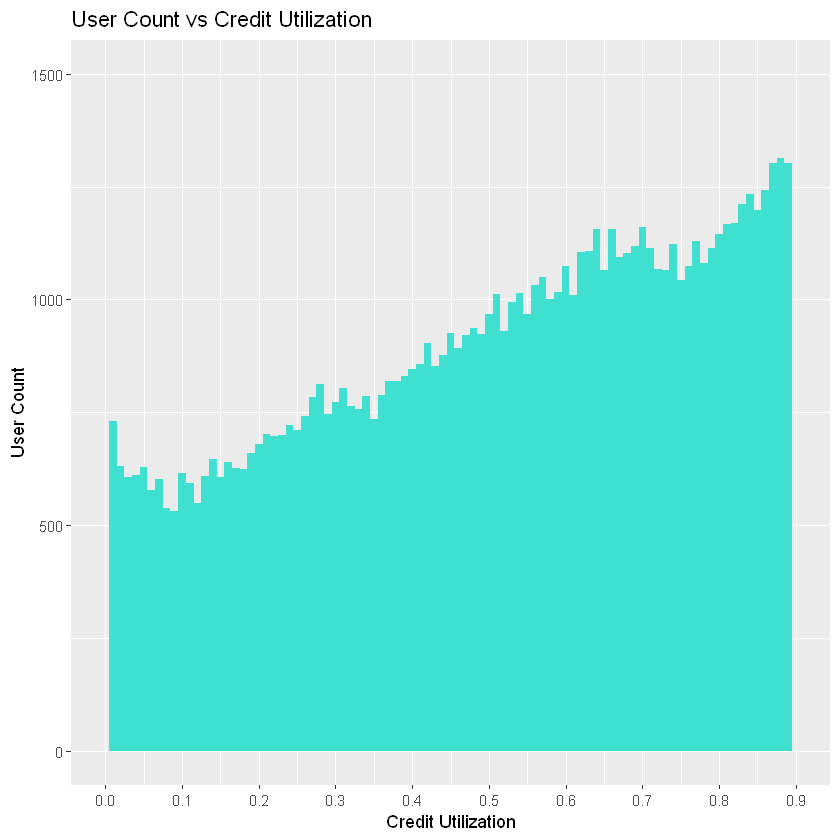

In [55]:
bankData <- newData['BankcardUtilization']

bankChart <- ggplot(aes(x = BankcardUtilization), data = bankData) +
                geom_histogram(binwidth = 0.01, fill = 'turquoise') +
                scale_x_continuous(limits = c(0,0.9), breaks = seq(0, 0.9, 0.1)) +
                scale_y_continuous(limits = c(0,1500))

bankChart + ggtitle('User Count vs Credit Utilization') +
            xlab('Credit Utilization') +
            ylab('User Count')

> More users have a higher credit utilization. Fewer users have a lower credit utilization. We could infer from this that as credit utilization increases, more people will look into getting a loan, probably trying to pay down on their credit cards. As credit utilization increases, the chance a person seek a loan is higher.

### Income Range

> The income range of the borrower at the time the listing was created.

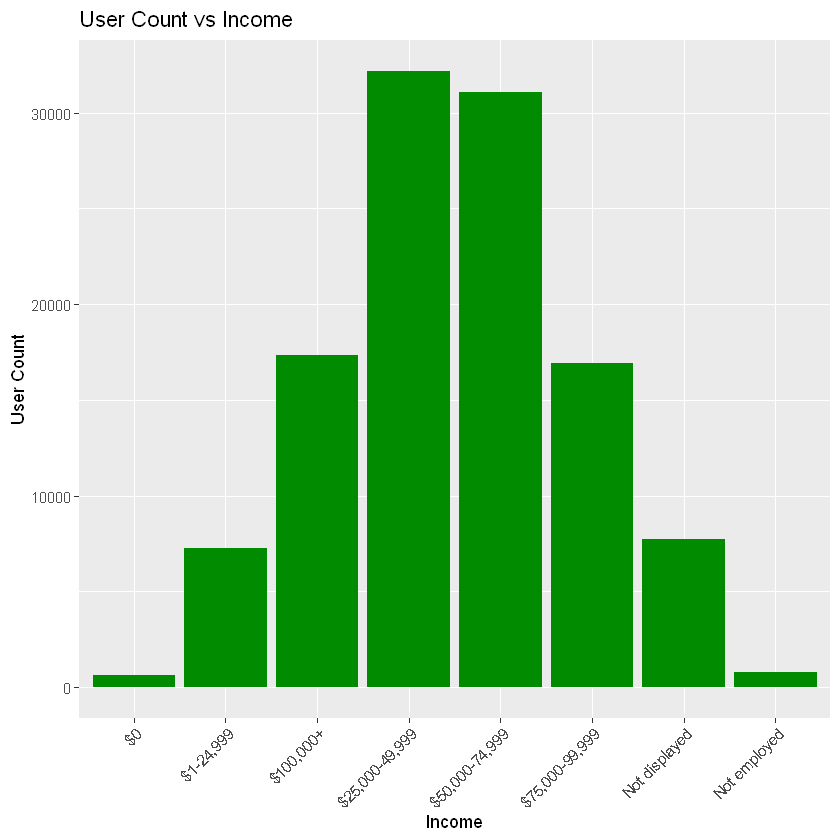

In [56]:
incomeData <- newData['IncomeRange']

incomeChart <- ggplot(aes(x = IncomeRange), data = incomeData) +
                geom_bar(fill = 'green4') +
                theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

incomeChart + ggtitle('User Count vs Income') +
            xlab('Income') +
            ylab('User Count')

> Most users have an income of 25,000 - 45,000, with somewhat fewer having an income between 50,000 - 74,999.

### Original Loan Amount

> The origination amount of the loan.

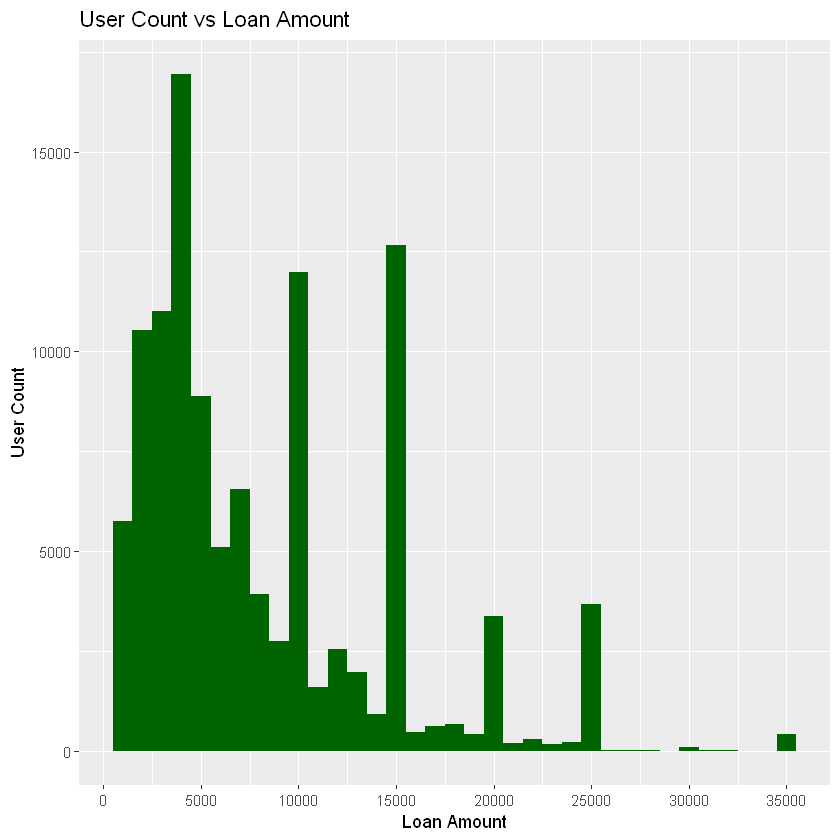

In [92]:
loanData <- newData['LoanOriginalAmount']

loanChart <- ggplot(aes(x = LoanOriginalAmount), data = loanData) +
                geom_histogram(binwidth = 1000, fill = 'darkgreen') +
                scale_x_continuous(breaks = seq(0, 35000, 5000))

loanChart + ggtitle('User Count vs Loan Amount') +
            xlab('Loan Amount') +
            ylab('User Count')

> This chart shows that there are loans for any amounts between 0 and 35,000. The interesting thing here to note is that big whole numbers are much more common than other numbers. For example, there is a spike in user count for 5000, 10000, 15000, 20000, etc. These big rounded numbers all have a spike in users and could tell us that a user would prefer a loan of 15,000 over 14,576 for example. These big rounded numbers are much more attractive from a general user perspective. This could also show us that loan companies typically give out loans of these big whole numbers, rather than inbetween them.

### Inquiries Last 6 Months

> Number of inquiries in the past six months at the time the credit profile was pulled.

Warning message:
"Removed 781 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


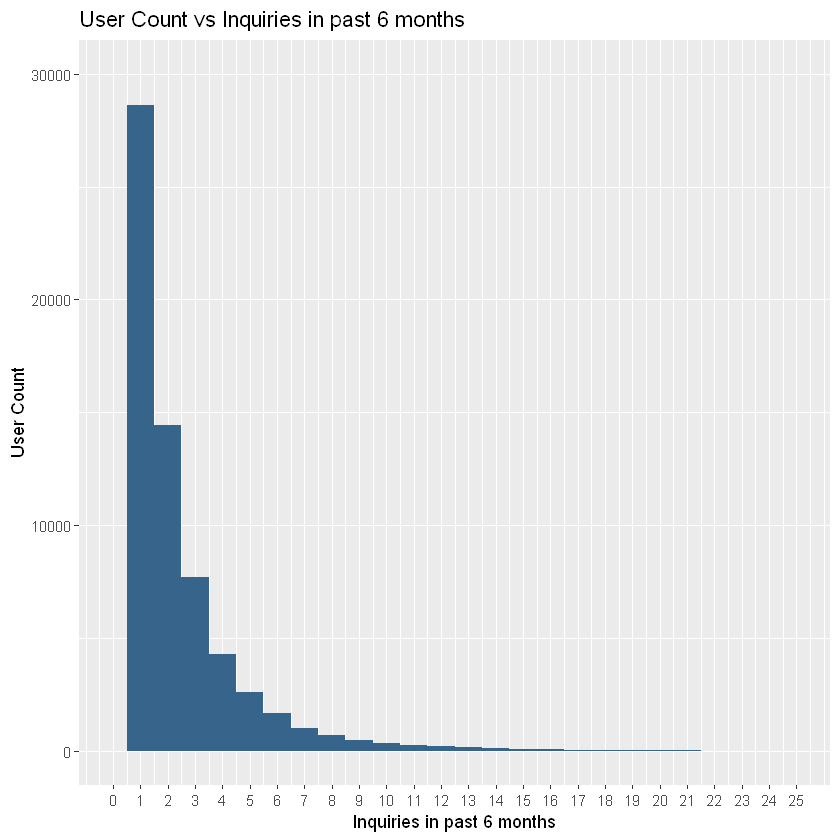

In [93]:
inquiryData <- newData['InquiriesLast6Months']

inquiryChart <- ggplot(aes(x = InquiriesLast6Months), data = inquiryData) +
                geom_histogram(binwidth = 1, fill = 'steelblue4') +
                scale_x_continuous(limits = c(0,25), breaks = seq(0, 25, 1)) +
                ylim(0,30000)

inquiryChart + ggtitle('User Count vs Inquiries in past 6 months') +
            xlab('Inquiries in past 6 months') +
            ylab('User Count')

> The vast majority of users have had 0 inquiries within the past 6 months. About half of that number of people have had 1 inquiry, and half of that number of users have had 2. It keeps decreasing with this relatively half the amount of users having another inquiry.

### Employment Status

> The employment status of the borrower at the time they posted the listing.

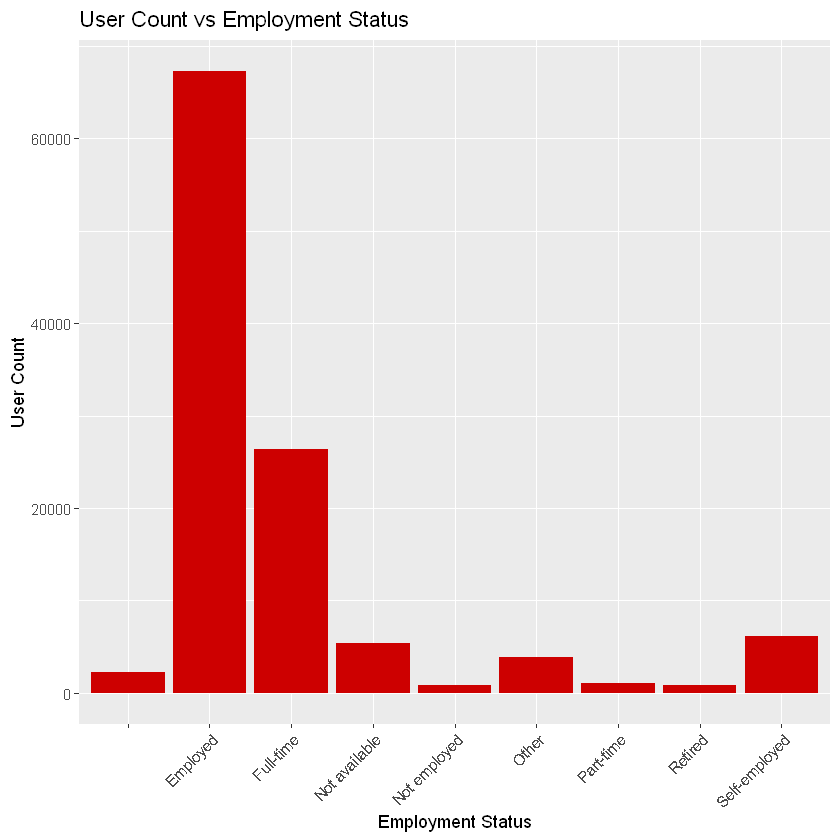

In [94]:
employmentData <- newData['EmploymentStatus']

employmentChart <- ggplot(aes(x = EmploymentStatus), data = employmentData) +
                geom_bar(fill = "red3") +
                theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

employmentChart + ggtitle('User Count vs Employment Status') +
            xlab('Employment Status') +
            ylab('User Count')

> The vast majority of users are employed in some fashion, mostly full-time.

### Credit Score Range Lower

> The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

Warning message:
"Removed 1005 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


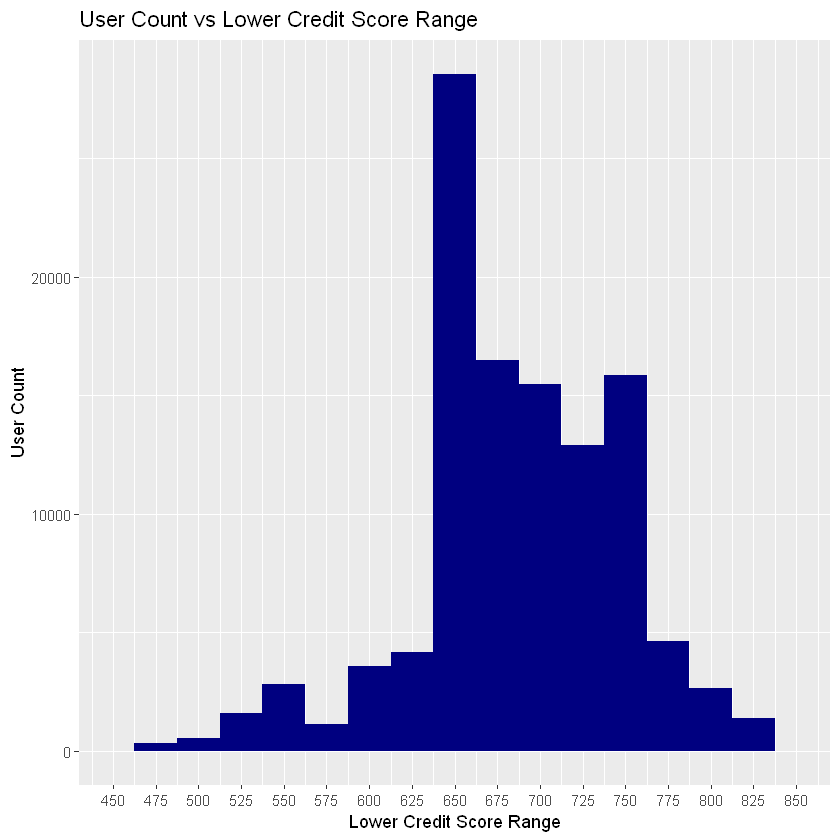

In [95]:
creditLowerData <- newData['CreditScoreRangeLower']

creditLowerChart <- ggplot(aes(x = CreditScoreRangeLower), data = creditLowerData) +
                    geom_histogram(binwidth=25, fill = 'navy') +
                    scale_x_continuous(limits = c(450,850), breaks = seq(450, 850, 25))

creditLowerChart + ggtitle('User Count vs Lower Credit Score Range') +
            xlab('Lower Credit Score Range') +
            ylab('User Count')

### Credit Score Range Upper

> The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

Warning message:
"Removed 1536 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


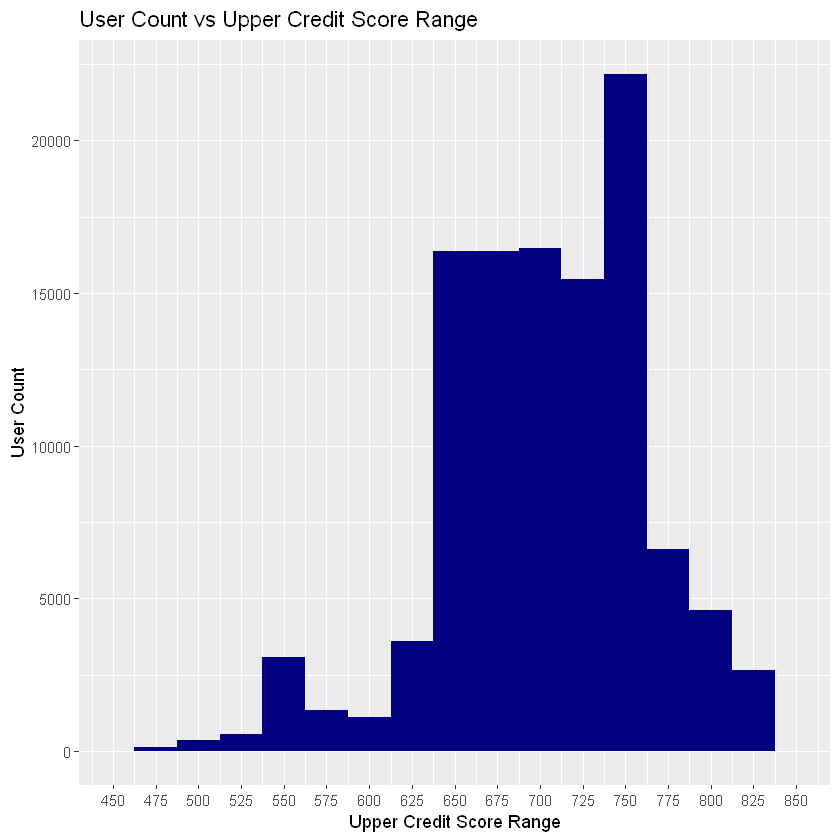

In [96]:
creditUpperData <- newData['CreditScoreRangeUpper']

creditUpperChart <- ggplot(aes(x = CreditScoreRangeUpper), data = creditUpperData) +
                    geom_histogram(binwidth=25, fill = 'navy') +
                    scale_x_continuous(limits = c(450,850), breaks = seq(450, 850, 25))

creditUpperChart + ggtitle('User Count vs Upper Credit Score Range') +
            xlab('Upper Credit Score Range') +
            ylab('User Count')

 > These two charts go well together. Together they show that most users are between ~650 - 750 credit score. With the majority of the lower limits being around 625-675 and the majority of the upper limits being around 725 - 775. Most users fall inbetween these ranges, however some users have less than the majority of the lower limit, and some users have a score higher than the majority of the upper limit.

### Loan Status

> The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

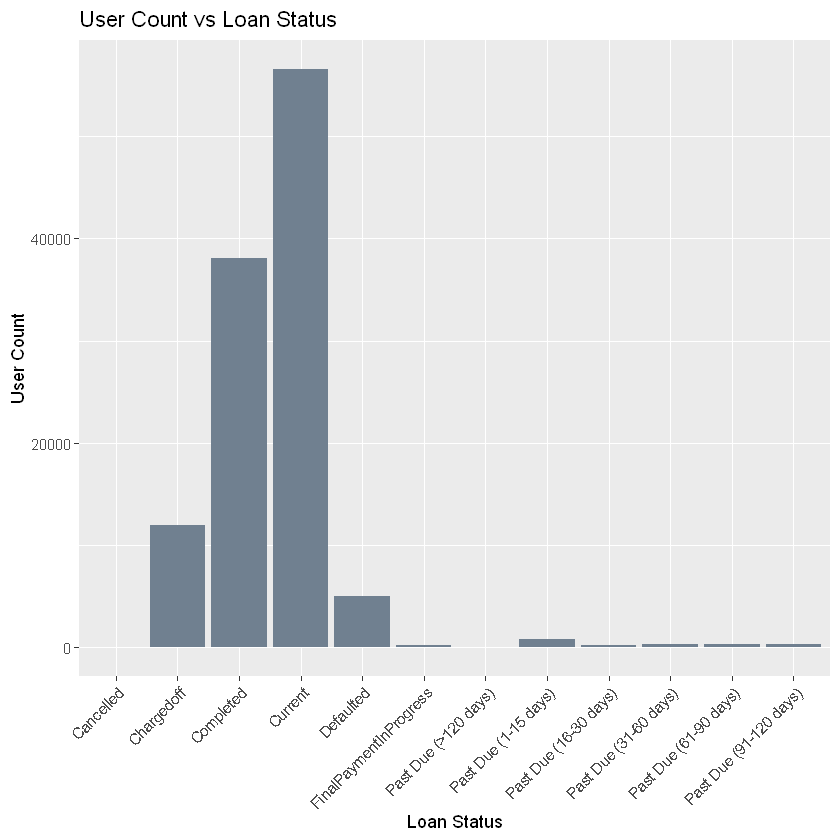

In [97]:
statusData <- newData['LoanStatus']

statusChart <- ggplot(aes(x = LoanStatus), data = statusData) +
                geom_bar(fill = "slategray") +
                theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

statusChart + ggtitle('User Count vs Loan Status') +
            xlab('Loan Status') +
            ylab('User Count')

> The vast majority of users have a current loan. A significant number of users have also completed their loans. Luckily, not many users are past due.

## Bivariate Analysis